# Sandbox

Testing `fastjmd95` on MPAS-Ocean `EC30to60E2r2` (LR) mesh.

***

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from fastjmd95 import rho

Load mesh and calculate pressure

In [2]:
# Load meshfile
f = '/global/cfs/cdirs/e3sm/inputdata/ocn/mpas-o/EC30to60E2r2/ocean.EC30to60E2r2.210210.nc'
ds = xr.open_dataset(f)

# Get lonlat
lons = ds.lonCell.values
lats = ds.latCell.values
lons = np.where(lons > 180, lons - 360, lons)

# Calculate top layer pressure at midpoint
depth = float(ds.refBottomDepth[0]) / 2
p = 0.059808 * (np.exp(-0.025 * depth) - 1.0) + 0.100766 * depth + 2.28405e-7 * depth**2
p = 10 * p # dbar

Testing on monthly results

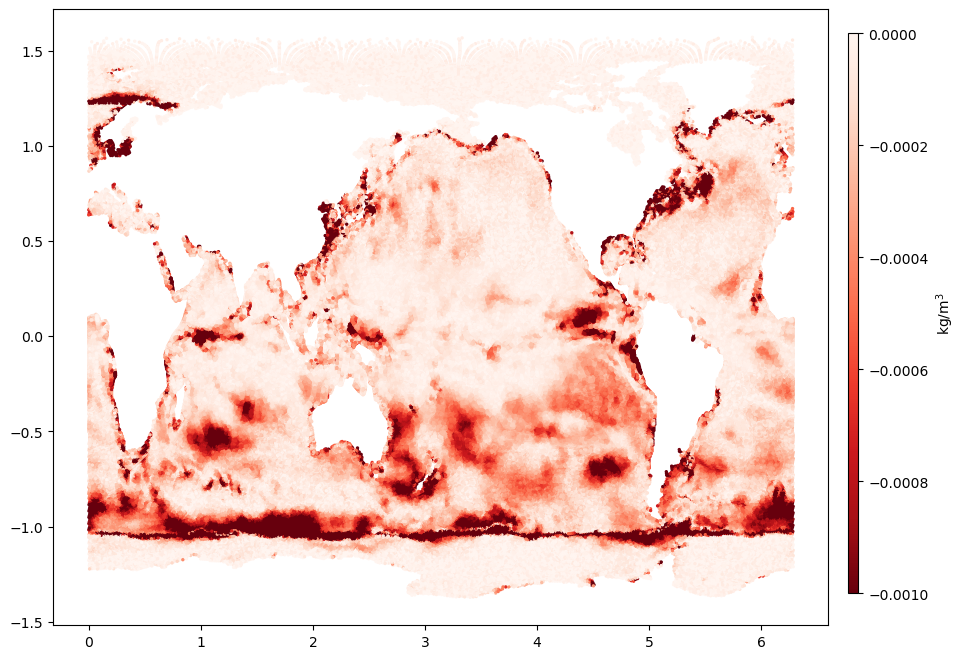

In [6]:
# Load results
f = '/pscratch/sd/l/lvroekel/LR/run_001_062/20210421_sim7_CORE_60to30E2r2.mpaso.hist.am.timeSeriesStatsMonthly.0001-01-01.nc'
ds = xr.open_dataset(f)

# Get variables
T = ds.timeMonthly_avg_activeTracers_temperature[0, :, 0]
S = ds.timeMonthly_avg_activeTracers_salinity[0, :, 0]
rho0 = ds.timeMonthly_avg_potentialDensity[0, :, 0]

# Calculate potential density
rho0_calc = rho(S, T, p)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
c = ax.scatter(lons, lats, s=2, c=rho0-rho0_calc, vmin=-1e-3, vmax=0, cmap='Reds_r')
cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(c, cax=cax, label='kg/m$^3$')

Testing on 30 min results from Alice

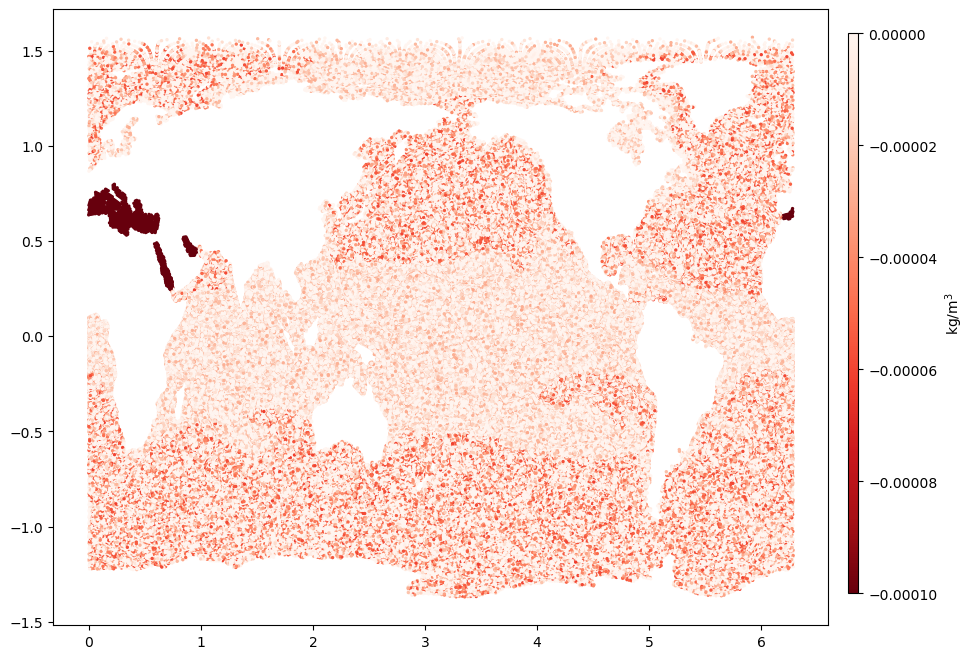

In [7]:
# Load results
f = '/global/cfs/cdirs/m4259/abarthel/E3SM_simulations/'
f = f + '20230927b.branchfrom69.v3alpha04_bigrid.piControl.chrysalis.mpaso.hist.am.highFrequencyOutput.0069-01-21_00.00.00.nc'
ds = xr.open_dataset(f)

# Get variables
T = ds.temperature[0, :, 0]
S = ds.salinity[0, :, 0]
rho0 = ds.potentialDensity[0, :, 0]

# Calculate potential density
rho0_calc = rho(S, T, p)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
c = ax.scatter(lons, lats, s=2, c=rho0-rho0_calc, vmin=-1e-4, vmax=0, cmap='Reds_r')
cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(c, cax=cax, label='kg/m$^3$')